In [1]:
# import libaray
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
# delete warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# read data
train_path = r"D:\Deep Learning project & tasks\Datasets\Vegetable Images\train"
test_path = r"D:\Deep Learning project & tasks\Datasets\Vegetable Images\test"
validation_path = r"D:\Deep Learning project & tasks\Datasets\Vegetable Images\validation"

In [4]:
# read image classes
image_classes=os.listdir(train_path)
print(image_classes)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [5]:
# visualizetion image
def plot_images(image_classes):
    plt.figure(figsize=(14,14))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        image_in_folder = os.listdir(image_path)
        
        first_image = image_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4,4,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()    

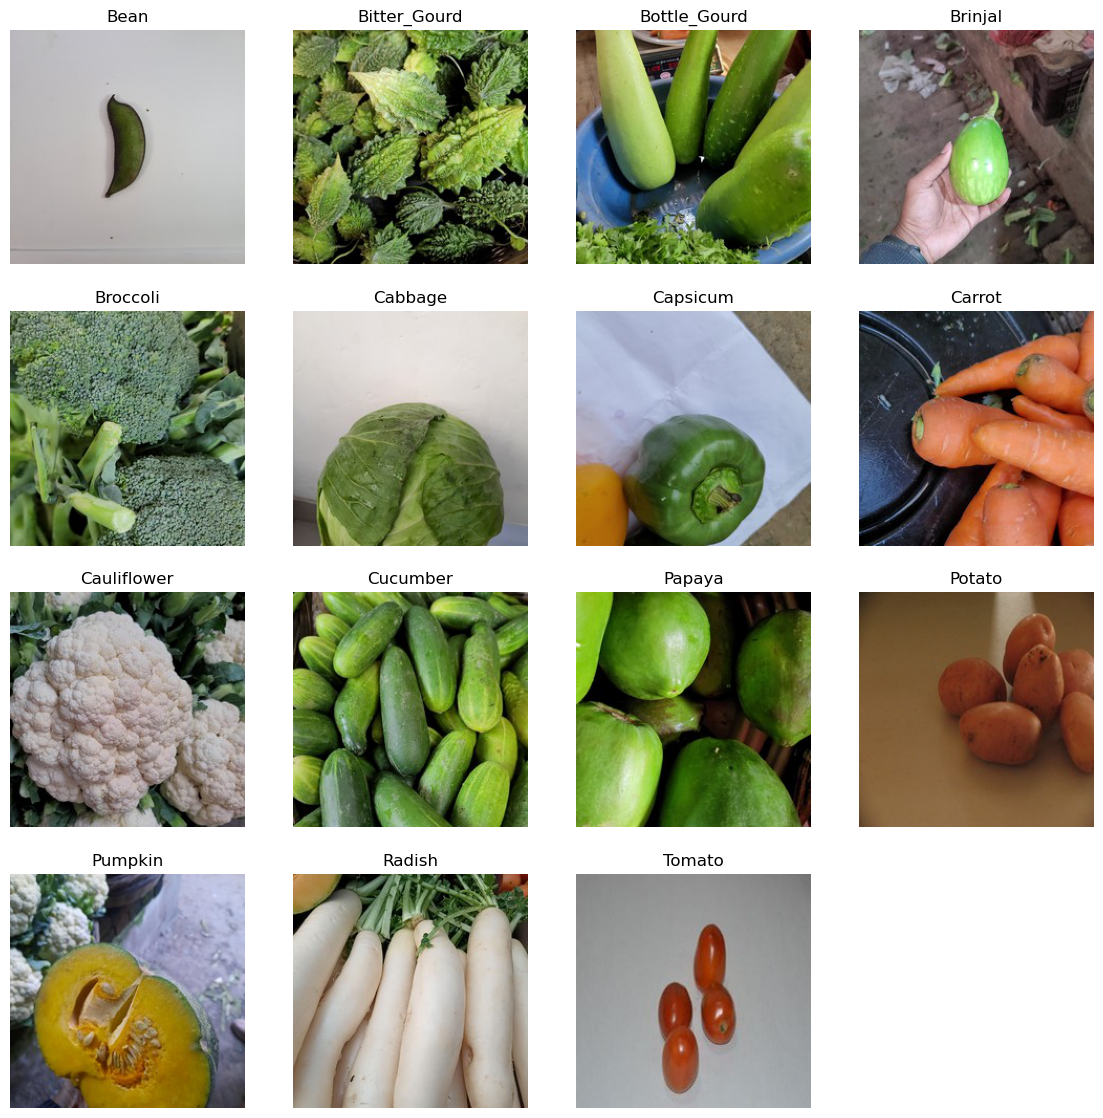

In [6]:
# call function for visualization
plot_images(image_classes)

In [7]:
# image preprocessing
image_generator = ImageDataGenerator(rescale = 1 / 255)

In [8]:
# applay image_generator on train data
train_data = image_generator.flow_from_directory(train_path, target_size=(224,224), batch_size=32,class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [9]:
# applay image_generator on test data
test_data = image_generator.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3000 images belonging to 15 classes.


In [10]:
# applay image_generator on validation data
val_data= image_generator.flow_from_directory(validation_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3000 images belonging to 15 classes.


In [11]:
# Build CNN Model
model = Sequential()

# add conv layer with input shape
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224,224,3]))
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# add conv layer 
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# add flatten layer
model.add(Flatten())
# fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
# add output layer
model.add(Dense(len(image_classes),activation='softmax'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,718,863 (98.11 MB)

 Trainable params: 25,718,863 (98.11 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compile model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# model fiting
model_history=model.fit(train_data, epochs=5, validation_data=val_data)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 463s 983ms/step - accuracy: 0.2888 - loss: 2.6736 - val_accuracy: 0.8110 - val_loss: 0.6184
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 454s 968ms/step - accuracy: 0.8552 - loss: 0.4657 - val_accuracy: 0.8670 - val_loss: 0.4308
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 461s 983ms/step - accuracy: 0.9527 - loss: 0.1662 - val_accuracy: 0.8500 - val_loss: 0.5212
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 451s 961ms/step - accuracy: 0.9669 - loss: 0.1108 - val_accuracy: 0.8863 - val_loss: 0.4411
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 450s 960ms/step - accuracy: 0.9796 - loss: 0.0676 - val_accuracy: 0.8893 - val_loss: 0.5545


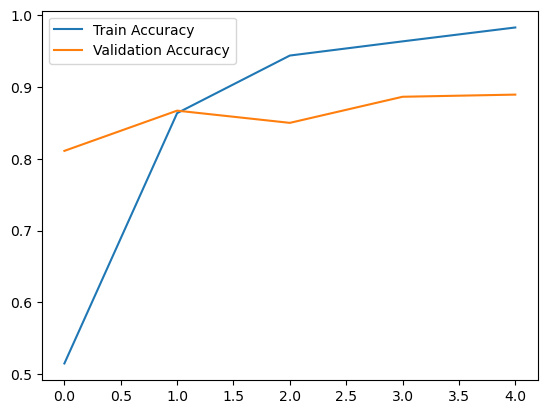

In [15]:
# visualize accuracy model
plt.plot(model_history.history['accuracy'],label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

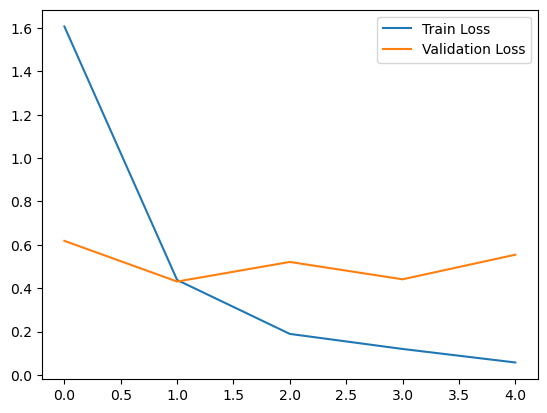

In [16]:
# visualize loss model
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [17]:
# test evaluate
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 454ms/step - accuracy: 0.8904 - loss: 0.5071


[0.4875696897506714, 0.8933333158493042]

In [18]:
# train evaluate
model.evaluate(train_data) 

469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.9905 - loss: 0.0332


[0.03321625292301178, 0.9903333187103271]

In [19]:
# save model
model.save('Vegetable.h5')

In [20]:
# map class from string to number
class_map=dict([value,key] for key, value in train_data.class_indices.items())

In [21]:
# prediction 
import numpy as np
def prediction(test_image, actual_label):
    # load & preprocessing image
    testing_img = image.load_img(test_image,target_size=(224,224))
    test_img_array = image.img_to_array(testing_img) / 255

    test_img_input = test_img_array.reshape(1,test_img_array.shape[0],
                                          test_img_array.shape[1],
                                         test_img_array.shape[2])
    # make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    # plot image
    plt.figure(figsize=(4,4))
    plt.imshow(test_img_array)
    plt.title(f'Actual label : {actual_label}, Predicted label : {predicted_img}')
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


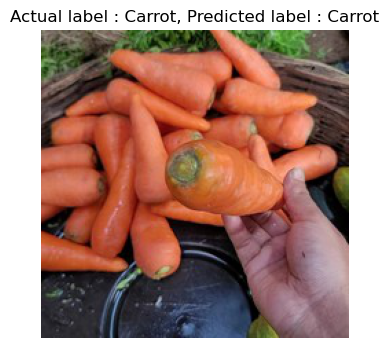

In [22]:
test_img = r"D:\Deep Learning project & tasks\Datasets\Vegetable Images\test\Carrot\1040.jpg"
prediction(test_img, actual_label='Carrot')